In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Нет пропущенных значений, все данные - числовые =>  можно применять decision tree

In [5]:
model = DecisionTreeRegressor(criterion='mse', max_depth = 4, min_samples_leaf = 10, max_features = 9) 
# это значения параметров, с которыми у меня получилась наиболее точная модель с применением decision tree

In [6]:
# x = data[['CRIM', 'ZN', 'INDUS', 'CHAS',  'RM', 'DIS', 'RAD',  'PTRATIO', 'B', 'LSTAT']]  # без учета коррелирующих между собой признаков
# x = data[['RM', 'LSTAT']] # только признаки, находящиеся в сильной корреляции с целевой переменной


In [7]:
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']] # все признаки

In [8]:
y = data['MEDV']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=400)

In [10]:
model.fit( x_train, y_train )
predictions = model.predict( x_test )

In [11]:
model.score(x_train, y_train)

0.8154388843029311

In [12]:
model.score(x_test, y_test)

0.7345399412504783

In [13]:
MSE = np.sum((y_test - model.predict( x_test )) ** 2)
MSE

3976.825075689932

При увеличении значения max_depth среднеквадратичная ошибка увеличивается, а модель переобучается

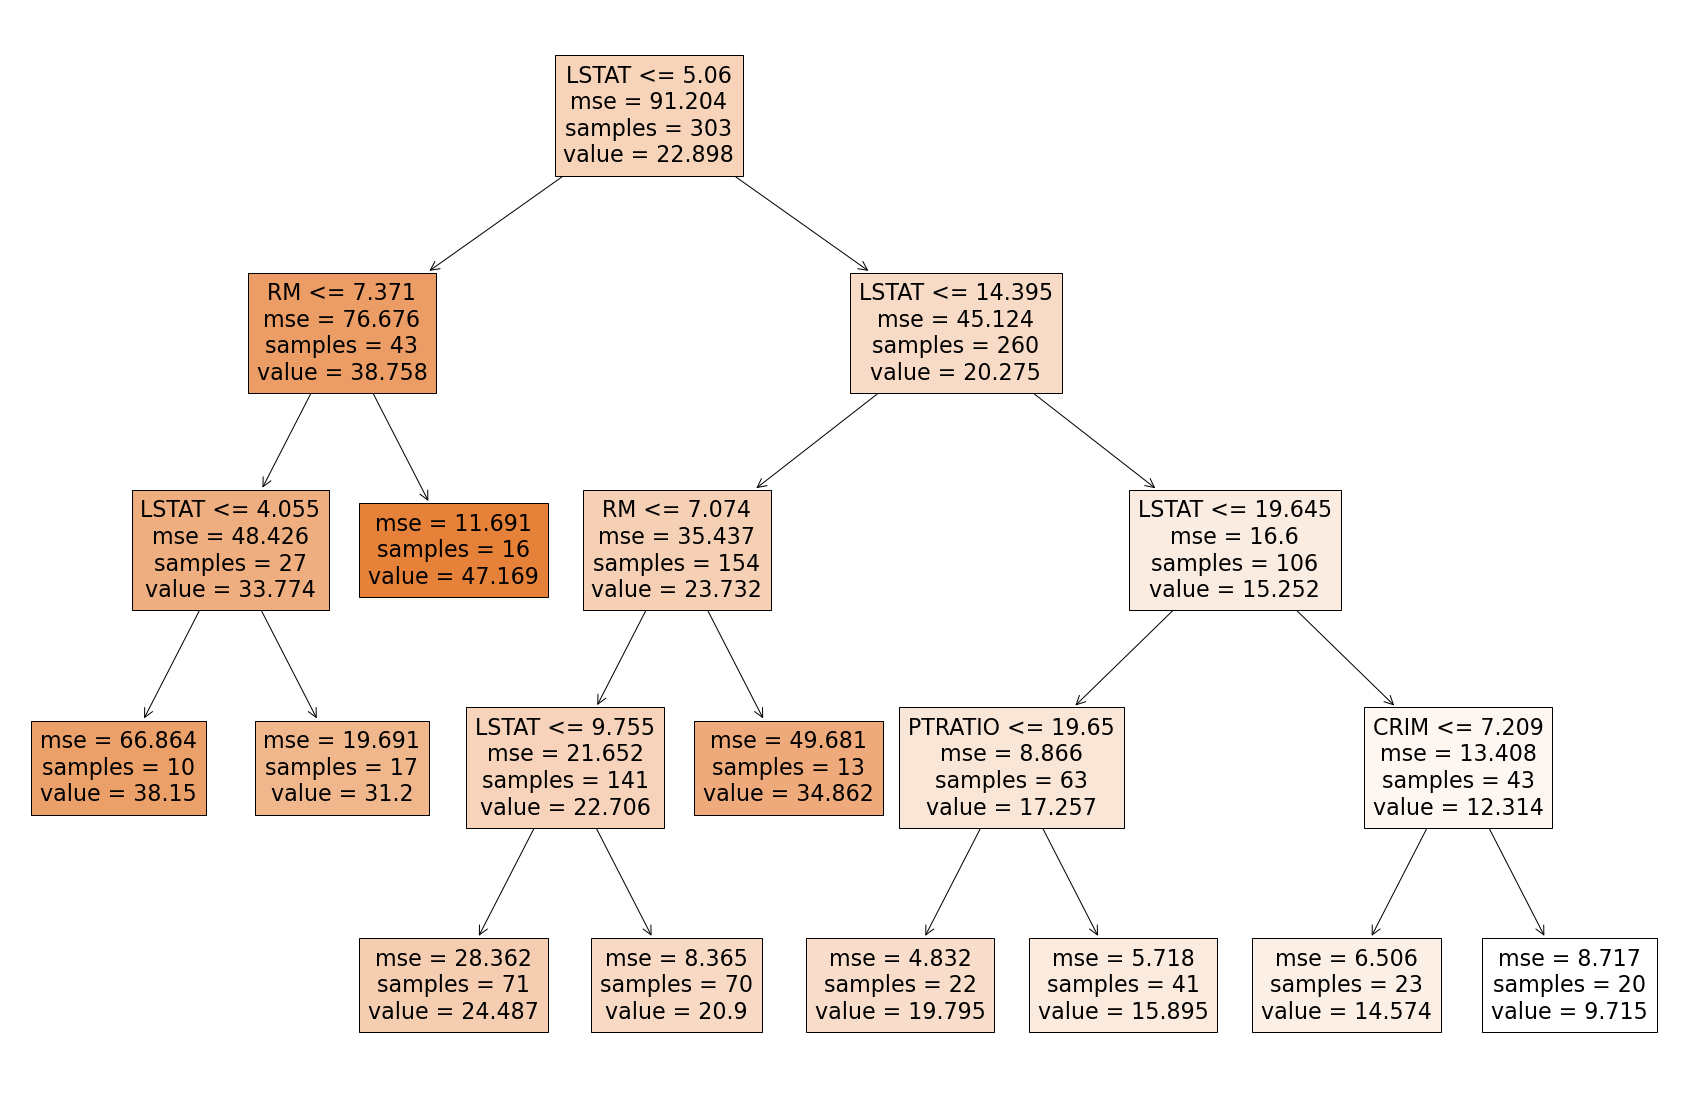

In [14]:
from sklearn import tree
plt.figure(figsize=(30, 20))
tree.plot_tree(model, feature_names=list(x), filled=True)
plt.show()

Если взять только те признаки, которые находятся в линейной зависимости с целевой переменной:

In [15]:
model = DecisionTreeRegressor(criterion='mse', max_depth = 4,  min_samples_leaf = 10, max_features = 2)
data = pd.read_csv(load_boston()['filename'], skiprows=1)
x = data[['RM', 'LSTAT']]
y = data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=400)
model.fit( x_train, y_train )
predictions = model.predict( x_test )
model.score(x_train, y_train)

0.800294849192806

In [16]:
model.score(x_test, y_test)

0.7257232865377152

In [17]:
MSE = np.sum((y_test - model.predict( x_test )) ** 2)
MSE

4108.906314994181

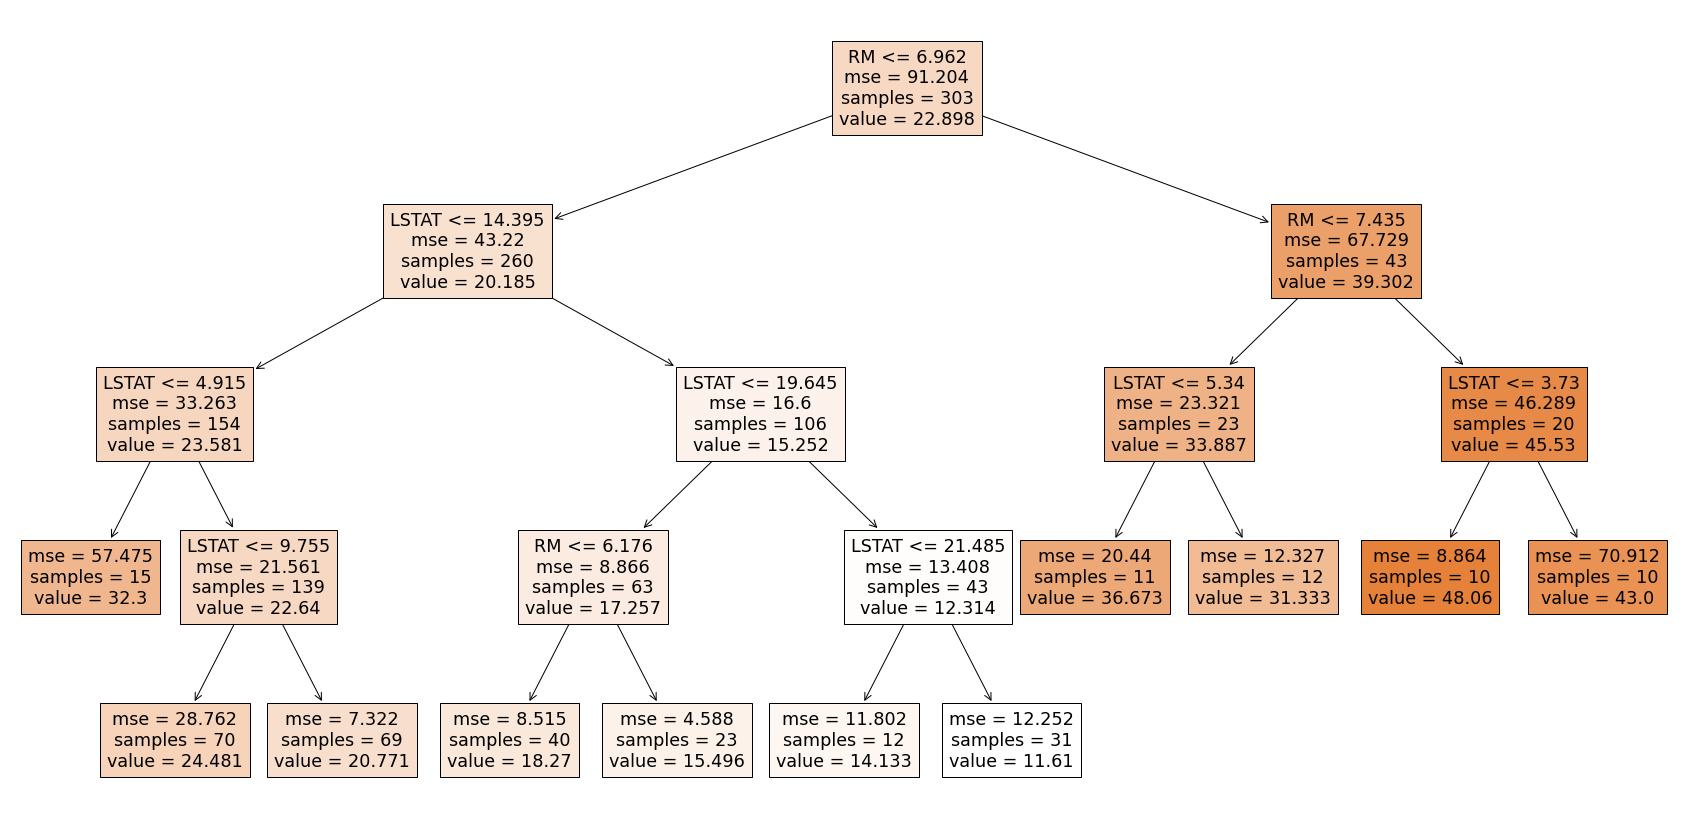

In [18]:
plt.figure(figsize=(30, 15))
tree.plot_tree(model, feature_names=list(x),  filled=True)
plt.show()

In [19]:
model = DecisionTreeRegressor(criterion='mse', max_depth = 30)
data = pd.read_csv(load_boston()['filename'], skiprows=1)
x = data[['RM', 'LSTAT']]
y = data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=400)
model.fit( x_train, y_train )
predictions = model.predict( x_test )
model.score(x_train, y_train)

1.0

In [20]:
model.score(x_test, y_test)

0.6055598662502619

При увеличении значения max_depth модель становится переобученной (?)

**Оценка важности фичей**

In [42]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
model = DecisionTreeRegressor(criterion='mse', max_depth = 30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=400)
model.fit( x_train, y_train )
predictions = model.predict( x_test )
model.feature_importances_

array([2.84216961e-02, 3.70790149e-04, 9.92508884e-03, 4.61422045e-04,
       3.10792339e-02, 5.88342395e-01, 1.02120855e-02, 1.03213995e-01,
       1.71561266e-03, 6.27984564e-03, 2.10273078e-02, 3.81925245e-03,
       1.95131275e-01])

<BarContainer object of 13 artists>

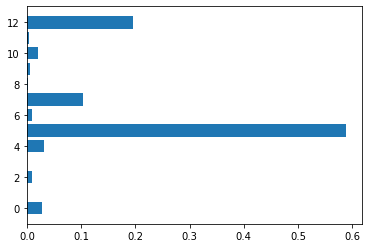

In [43]:
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)

То, что на лекции НЕ рекомендовали делать - оценить важность фичей, а потом применить линейную регрессию. И все же проверим, что получится.

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


model = make_pipeline(StandardScaler(),LinearRegression())

In [50]:
x = data[['RM', 'DIS',  'LSTAT']]
y = data.MEDV

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=400)

In [52]:
model.fit( x_train, y_train )
predictions = model.predict( x_test )

In [53]:
model.score(x_train, y_train)

0.656519089606804

In [54]:
model.score(x_test, y_test)

0.6093849966960503

Результат получился хуже, чем после оценки датасета с помощью матрицы корреляций и применения линейной регрессии в предыдущем ДЗ https://github.com/rfmost/FE_ML_homeworks/blob/main/HW_5_Boston.ipynb